In [1]:
import numpy as np 
import pandas as pd
from scipy import stats 
import matplotlib.pyplot as plt
from ipynb.fs.full.Quantile_Normalization import quantile_norm, quantile_norm_log
from sklearn.decomposition import PCA 


# Import TCGA melanoma data 
## Rna read data
file='../data/counts.txt'
with open(file, 'rt') as f: 
    read_counts=pd.read_csv(f,index_col=0) 
    
counts=read_counts.values

In [2]:
log_counts_normalized=quantile_norm_log(counts)

In [3]:
def most_variable_rows(data,*,n=1500):
    """
    
    Subset n most variable genes
    
    Parameters
    ..........
    
    data: 2D array of float
    n: int, optional 
        Number of rows to return. 
    
    Return
    ..........
    variable_data=2D array of float 
    
    """
    
    # compute accorss columns
    
    rowvar=np.var(data,axis=1)
    # get indices
    
    sort_indices=np.argsort(rowvar)[-n:]
    
    variable_data=data[sort_indices,:]
    
    return variable_data



In [4]:
counts_log=log_counts_normalized
counts_var=most_variable_rows(counts_log,n=1500)

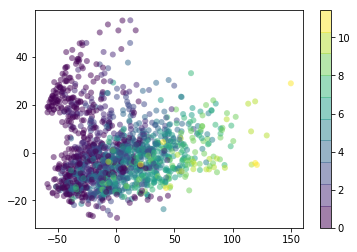

In [5]:
pca=PCA(2)
projected=pca.fit_transform(counts_var)
plt.scatter(projected[:,0],projected[:,1],c=counts_var[:, 1], edgecolor='none',alpha=.5, cmap=plt.cm.get_cmap('viridis',10))
plt.colorbar();

Text(0, 0.5, 'cumulative explained ratio')

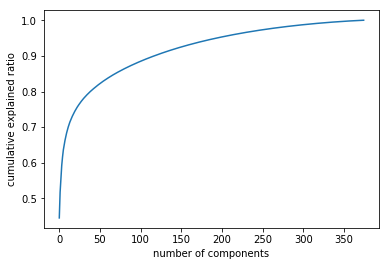

In [6]:
pca=PCA().fit(counts_var)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained ratio')